# imports


In [51]:
#pip install pandas
#pip install numpy
#pip install -U scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Counter proporciona un diccionario donde cada elemento distinto se almacena 
# como claves con un valor asociado igual a su cuenta
from collections import Counter
 

import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

## El problema de la accuracy
La matriz de confusión y la accuracy son útiles si la distribución de clases es algo balanceada. 


Si es muy drástica, y tenemos, por ejemplo;  90/100 ejemplos positivos y 10/100 negativos y aplicamos un clasificador "tonto" que asigne la clase mayoritaria (en este caso, el positivo) tendríamos una accuracy de 90+0/90+10+0+0= 0.90 = 90%.


 Si no supiéramos que el clasificador asigna la clase mayoritaria, podríamos llegar a pensar que se trata de un muy buen clasificador!!

# ver la distribución de clases  del dataset


### datos usados para estos ejemplos.

In [52]:
 
# Generar un dataset muy desbalanceado
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, weights=[0.99, 0.01], random_state=42)

# Split the data into training and test sets
dX_train, dX_test, dy_train, dy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dummy classifier that always predicts the majority class
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(dX_train, dy_train)

# Make predictions on the test set
predictions = dummy_classifier.predict(dX_test)
 

## Impresión de una matriz de confusión como heatmap

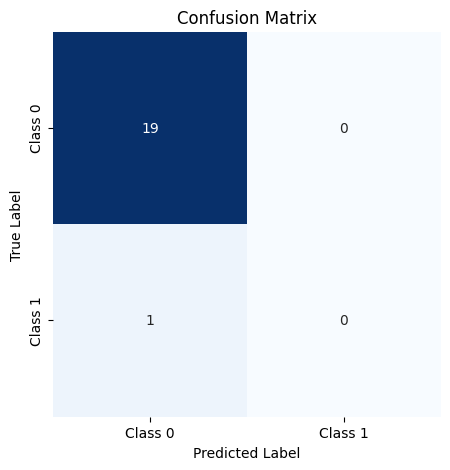

In [53]:

import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(dy_test,predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
 

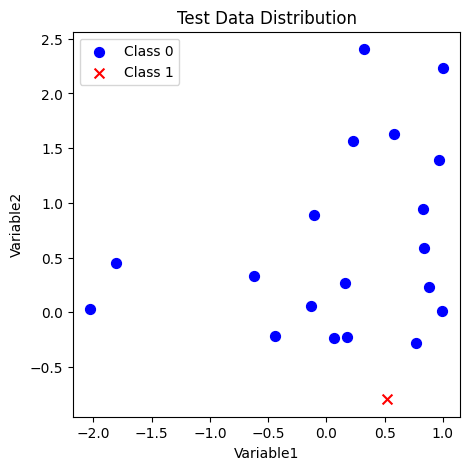

In [54]:
import matplotlib.pyplot as plt


####################### DATOS DE EJEMPLO

# Generar un dataset muy desbalanceado
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, weights=[0.99, 0.01], random_state=42)

# Split the data into training and test sets
dX_train, dX_test, dy_train, dy_test = train_test_split(X, y, test_size=0.2, random_state=42)



####################### DATOS DE EJEMPLO

# Plotting the data
plt.figure(figsize=(5, 5))

# Plotting the majority class (Class 0)
plt.scatter(dX_test[dy_test == 0][:, 0], dX_test[dy_test == 0][:, 1], label='Class 0', c='blue', marker='o', s=50)

# Plotting the minority class (Class 1)
plt.scatter(dX_test[dy_test == 1][:, 0], dX_test[dy_test == 1][:, 1], label='Class 1', c='red', marker='x', s=50)

plt.title('Test Data Distribution')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.legend()
plt.show()

# OTRAS 

### datos

In [55]:
# Load the dataset
df_train = pd.read_csv("datos/datos03_train.csv")
X_train = df_train.drop('Clase', axis=1)
y_train = df_train['Clase']

df_test = pd.read_csv("datos/datos03_train.csv")
X_test = df_test.drop('Clase', axis=1)
y_test = df_test['Clase']
y_true = y_test

# Crear un pipeline con el escalador y el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('knn', KNeighborsClassifier())  # KNeighbors Classifier
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_scores = pipeline.predict_proba(X_test)

### código métricas


In [56]:
############### precision ############### 
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, pos_label='c1')
print('Precision : '+ str(precision))
############### recall /sensibilidad ############### 
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, pos_label='c1')
recall
print('Recall : '+ str(recall))
############### F1 SCORE ############### 
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, pos_label='c1')
f1
print('F1 Score : '+ str(f1))

Precision : 0.9208037825059102
Recall : 0.9617283950617284
F1 Score : 0.9408212560386473


## CURVA ROC. 

In [ ]:
 
fpr, tpr, thresholds = roc_curve(y_true, y_scores[:,0], pos_label='c1')  # y_scores son las puntuaciones del modelo
auc = roc_auc_score(y_true, y_scores[:,0])
 

# Assuming you already have fpr, tpr, thresholds from roc_curve
# y_true and y_scores are the true labels and predicted probabilities, respectively

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc_score(y_true, y_scores[:,0]):.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## RESUMEN DE MÉTRICAS EN TABLA - CLASIFICATION REPORT


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))